In [38]:
import pandas as pd
import numpy as np
import os, random

import matplotlib.pyplot as plt
import cv2 as cv
import torch
from torch.utils.data import DataLoader

In [2]:
label_class = {0: 'angry', 1: 'disgust', 2: 'fear', 3: 'happy', 4: 'neutral', 5: 'sad', 6: 'surprise'}
class_label = {v: k for k, v in label_class.items()}

In [3]:
train_base_path = 'images/train/'
val_base_path = 'images/validation/'

classes = list(label_class.values())
train_paths = [train_base_path + each_class for each_class in classes]
val_paths = [val_base_path + each_class for each_class in classes]

In [30]:
def load_data(addr, classes_dict):
        
    imgs = []
    
    for paths in addr:
        mood_class = paths.split('/')[-1]
        samples = os.listdir(paths)
        for i, each_sample in enumerate(samples):
            imgs.append((cv.cvtColor(cv.imread(paths + '/' + each_sample), cv.COLOR_BGR2GRAY), classes_dict[mood_class]))

    random.shuffle(imgs)
            
    return np.array([each[0] for each in imgs]), np.array([each[1] for each in imgs])

In [31]:
tr_data, tr_lbls = load_data(train_paths, class_label)
val_data, val_lbls = load_data(val_paths, class_label)

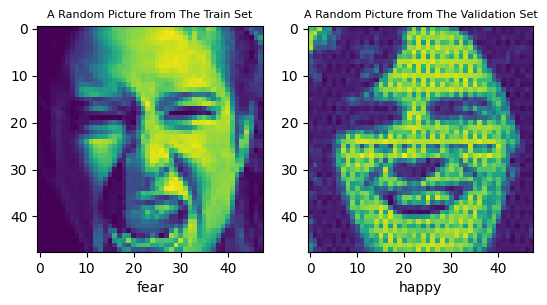

In [32]:
tr_idx = random.randint(0, tr_data.shape[0])
val_idx = random.randint(0, val_data.shape[0])
img1 = tr_data[tr_idx]
lbl1 = tr_lbls[tr_idx]
img2 = val_data[val_idx]
lbl2 = val_lbls[val_idx]

fig, (ax1, ax2) = plt.subplots(1, 2)

ax1.set_xlabel(label_class[lbl1])
ax1.set_title('A Random Picture from The Train Set', fontsize=8)
ax2.set_xlabel(label_class[lbl2])
ax2.set_title('A Random Picture from The Validation Set', fontsize=8)

ax1.imshow(img1)
ax2.imshow(img2)

In [36]:
tr_tensor = torch.from_numpy(tr_data).to(torch.device("cuda" if torch.cuda.is_available() else "cpu"))
val_tensor = torch.from_numpy(val_data).to(torch.device("cuda" if torch.cuda.is_available() else "cpu"))
tr_lbl_tensor = torch.from_numpy(tr_lbls).to(torch.device("cuda" if torch.cuda.is_available() else "cpu"))
val_lbl_tensor = torch.from_numpy(val_lbls).to(torch.device("cuda" if torch.cuda.is_available() else "cpu"))

In [37]:
tr_tensor.shape

torch.Size([28821, 48, 48])

In [39]:
tr_loader = DataLoader(list(zip(tr_tensor, tr_lbl_tensor)), shuffle=True, batch_size=16)
# val_loader = DataLoader(list(zip(val_tensor, val_lbl_tensor)), shuffle=True, batch_size=16)

for X_batch, y_batch in tr_loader:
    print(X_batch, y_batch)
    break

tensor([[[ 27,  29,  37,  ...,  64,  69,  43],
         [ 38,  35,  34,  ...,  59,  71,  66],
         [ 29,  30,  30,  ...,  62,  69,  66],
         ...,
         [ 69,  68,  58,  ...,  38,  85,  50],
         [ 80,  96,  91,  ...,  41,  71,  51],
         [ 62,  84,  51,  ...,  46,  47,  49]],

        [[ 59, 164, 194,  ..., 116, 120,  58],
         [ 74, 186, 194,  ..., 128, 125,  67],
         [ 98, 193, 191,  ..., 145, 131,  74],
         ...,
         [199, 187, 178,  ..., 110, 117, 131],
         [203, 192, 179,  ..., 124, 135, 147],
         [205, 198, 181,  ..., 128, 138, 150]],

        [[181, 183, 179,  ..., 135, 124, 123],
         [180, 182, 179,  ..., 126, 127, 110],
         [181, 181, 181,  ..., 121, 122, 102],
         ...,
         [ 13,  14,  18,  ...,  29,  23,  31],
         [ 13,  13,  16,  ...,  43,  29,  43],
         [ 14,  15,  14,  ...,  52,  40,  71]],

        ...,

        [[236, 235, 239,  ..., 168, 172, 163],
         [236, 235, 234,  ..., 183, 182, 175]